# Explore here

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.to_csv('../data/raw/originaldataframe.csv', index = False)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.drop_duplicates(inplace=True)

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_n'] = pd.factorize(df[column])[0]

df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [6]:
from utils import columnas_categoricas

columnas_categoricas
col_num_cat = ['age','smoker','region']
col_cat = columnas_categoricas(df,col_num_cat)

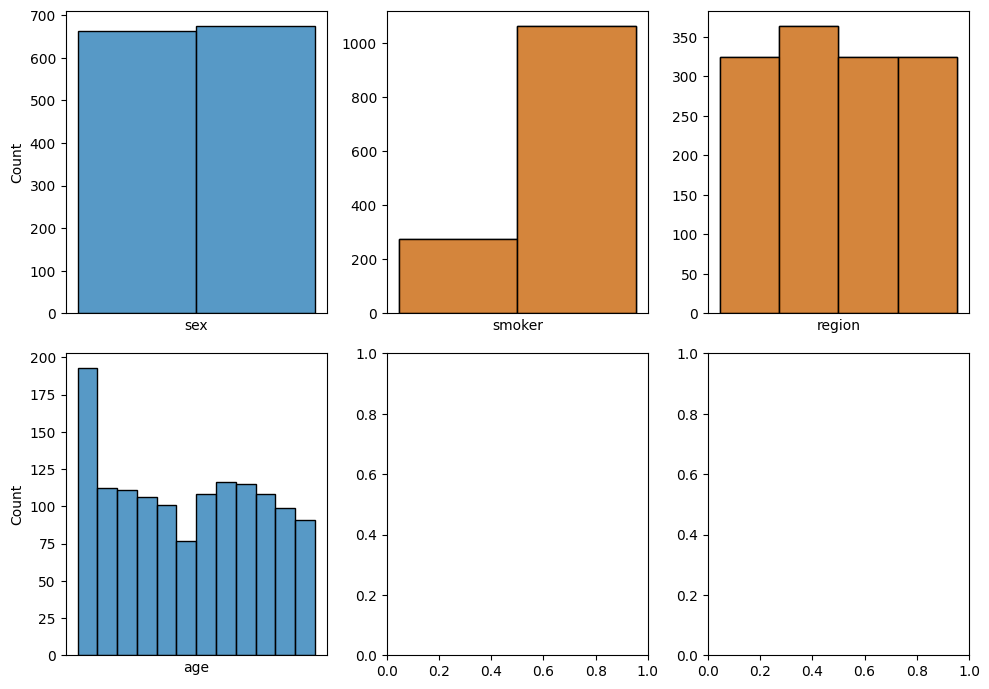

In [7]:
from utils import analisis_categorico_categorico

analisis_categorico_categorico(df,col_num_cat)

In [8]:
from utils import columnas_numericas

columnas_numericas(df)

['age', 'bmi', 'children', 'charges', 'sex_n', 'smoker_n', 'region_n']

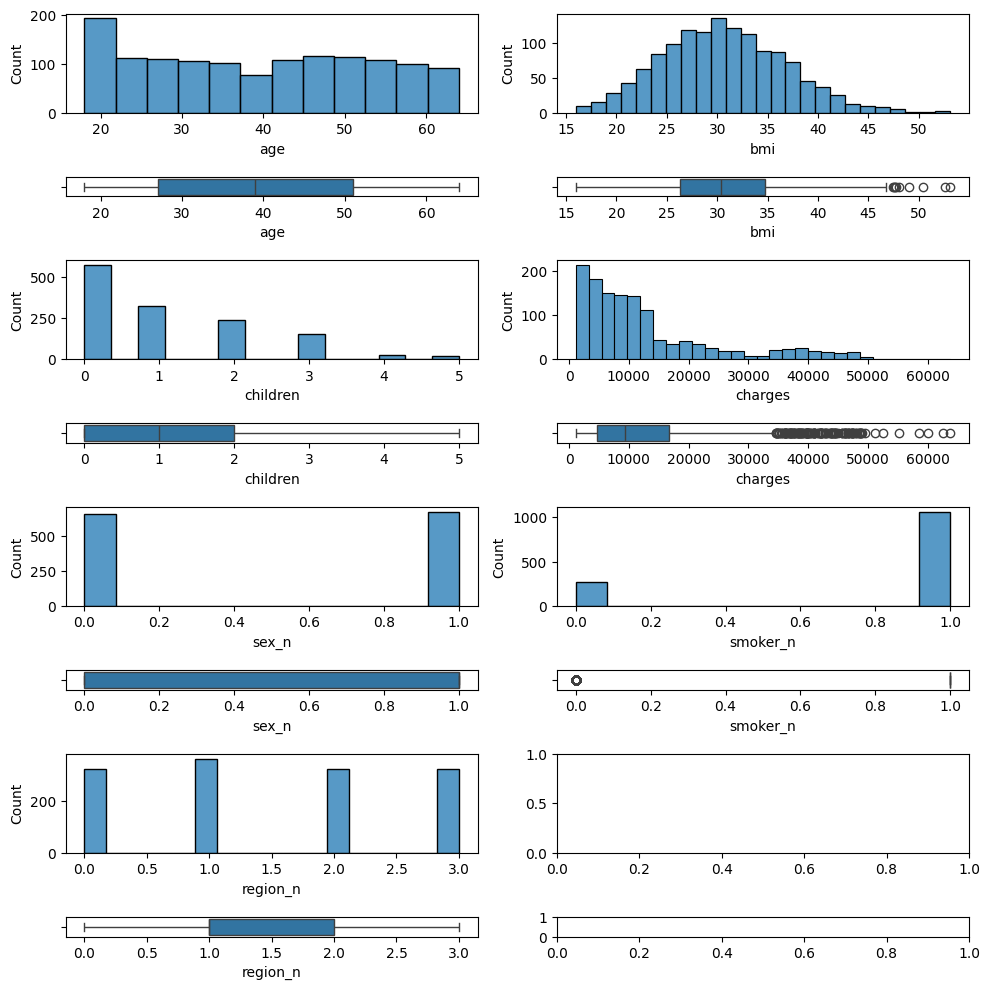

In [9]:
from utils import analisis_numerico_numerico

analisis_numerico_numerico(df,'charges',['sex','smoker','region'])

In [14]:
#error en esta automatización 
#from utils import analisis_numerico_numerico_multivariante
#analisis_numerico_numerico_multivariante(df,'charge',['sex','smoker','region'])

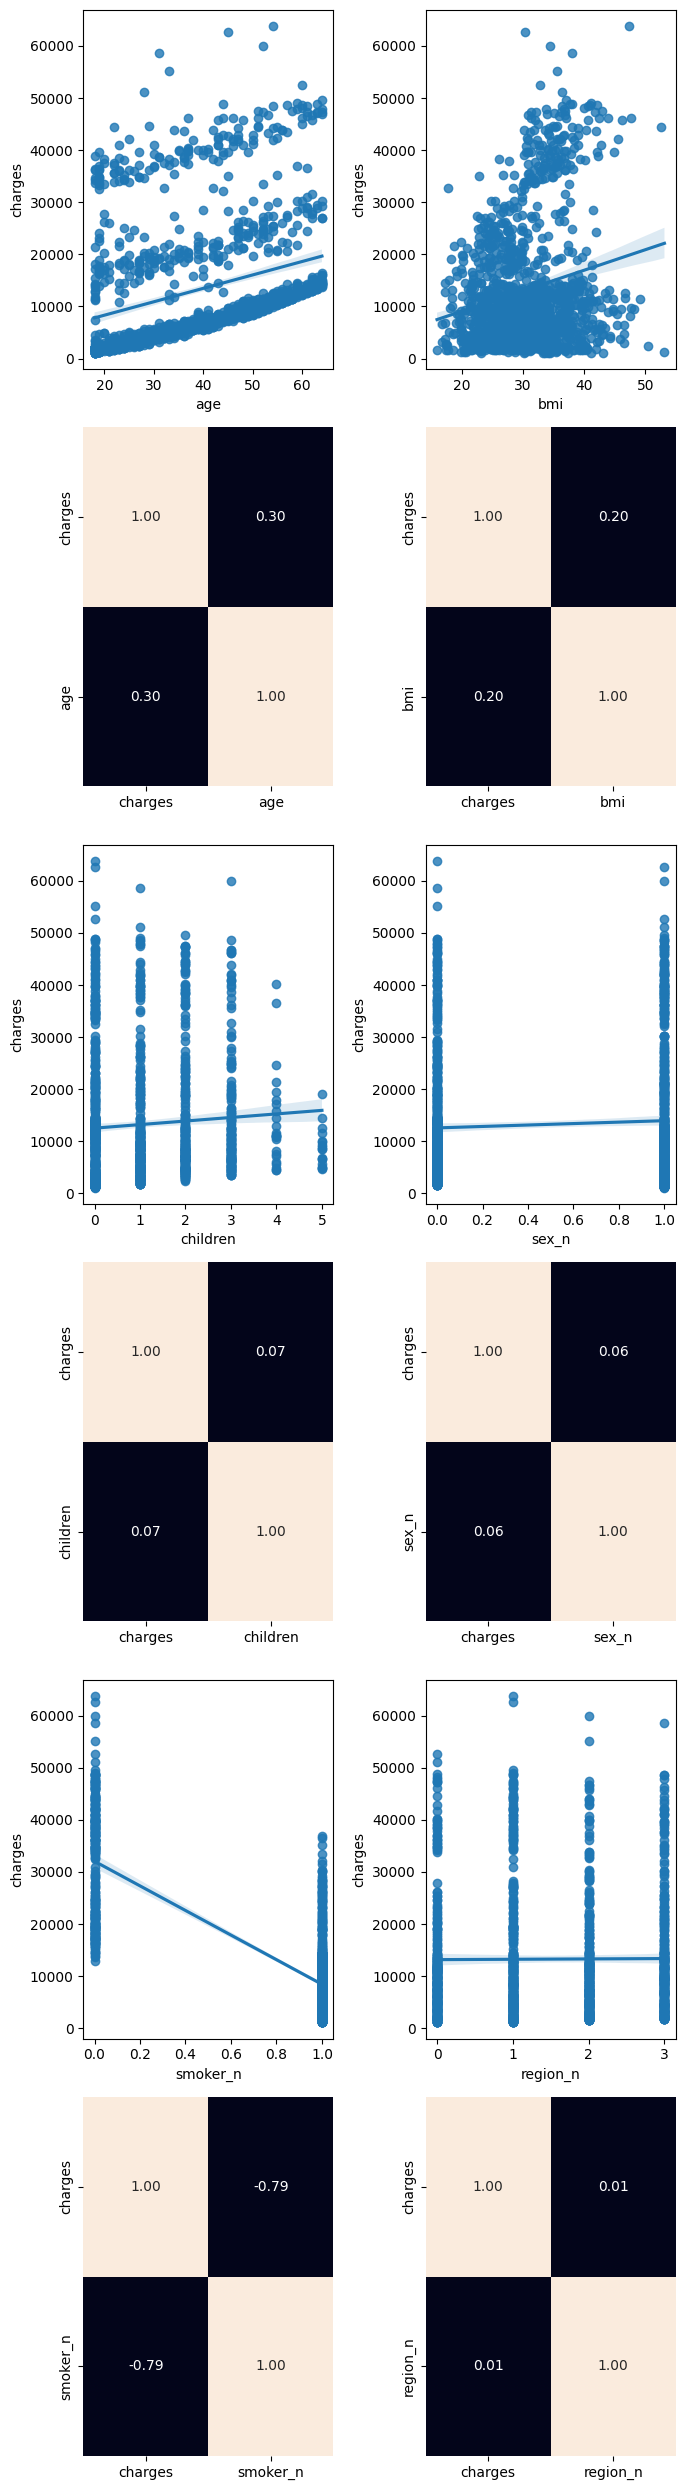

In [28]:
#Análisis numérico-numérico

fig, axis = plt.subplots(6, 2, figsize = (7,25))

sns.regplot(ax = axis[0,0], data=df,x='age', y='charges')
sns.heatmap(df[['charges','age']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df,x='bmi', y='charges')
sns.heatmap(df[['charges','bmi']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax = axis[2,0], data=df,x='children', y='charges')
sns.heatmap(df[['charges','children']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

sns.regplot(ax = axis[2,1], data=df,x='sex_n', y='charges')
sns.heatmap(df[['charges','sex_n']].corr(),annot=True,fmt='.2f',ax=axis[3,1],cbar=False)

sns.regplot(ax = axis[4,0], data=df,x='smoker_n', y='charges')
sns.heatmap(df[['charges','smoker_n']].corr(),annot=True,fmt='.2f',ax=axis[5,0],cbar=False)

sns.regplot(ax = axis[4,1], data=df,x='region_n', y='charges')
sns.heatmap(df[['charges','region_n']].corr(),annot=True,fmt='.2f',ax=axis[5,1],cbar=False)

plt.tight_layout()
plt.show()


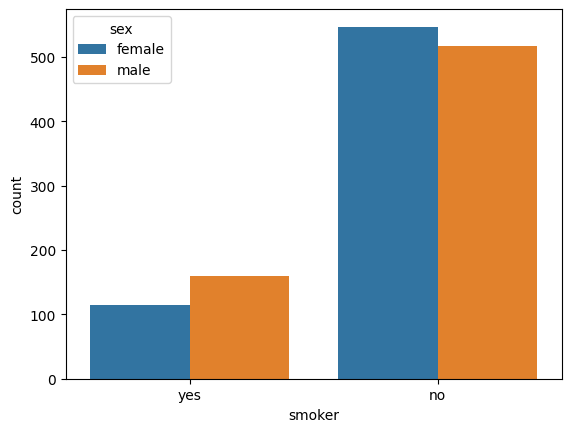

In [36]:
from utils import analisis_categorico_categorico_multivariante

analisis_categorico_categorico_multivariante(df,'smoker','sex')

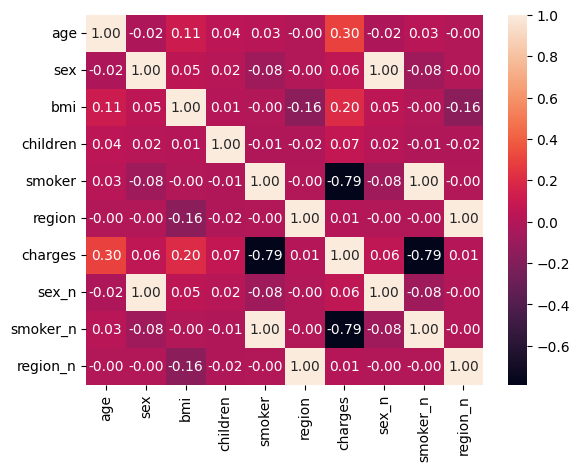

In [37]:
from utils import analisis_numerico_categorico

analisis_numerico_categorico(df)

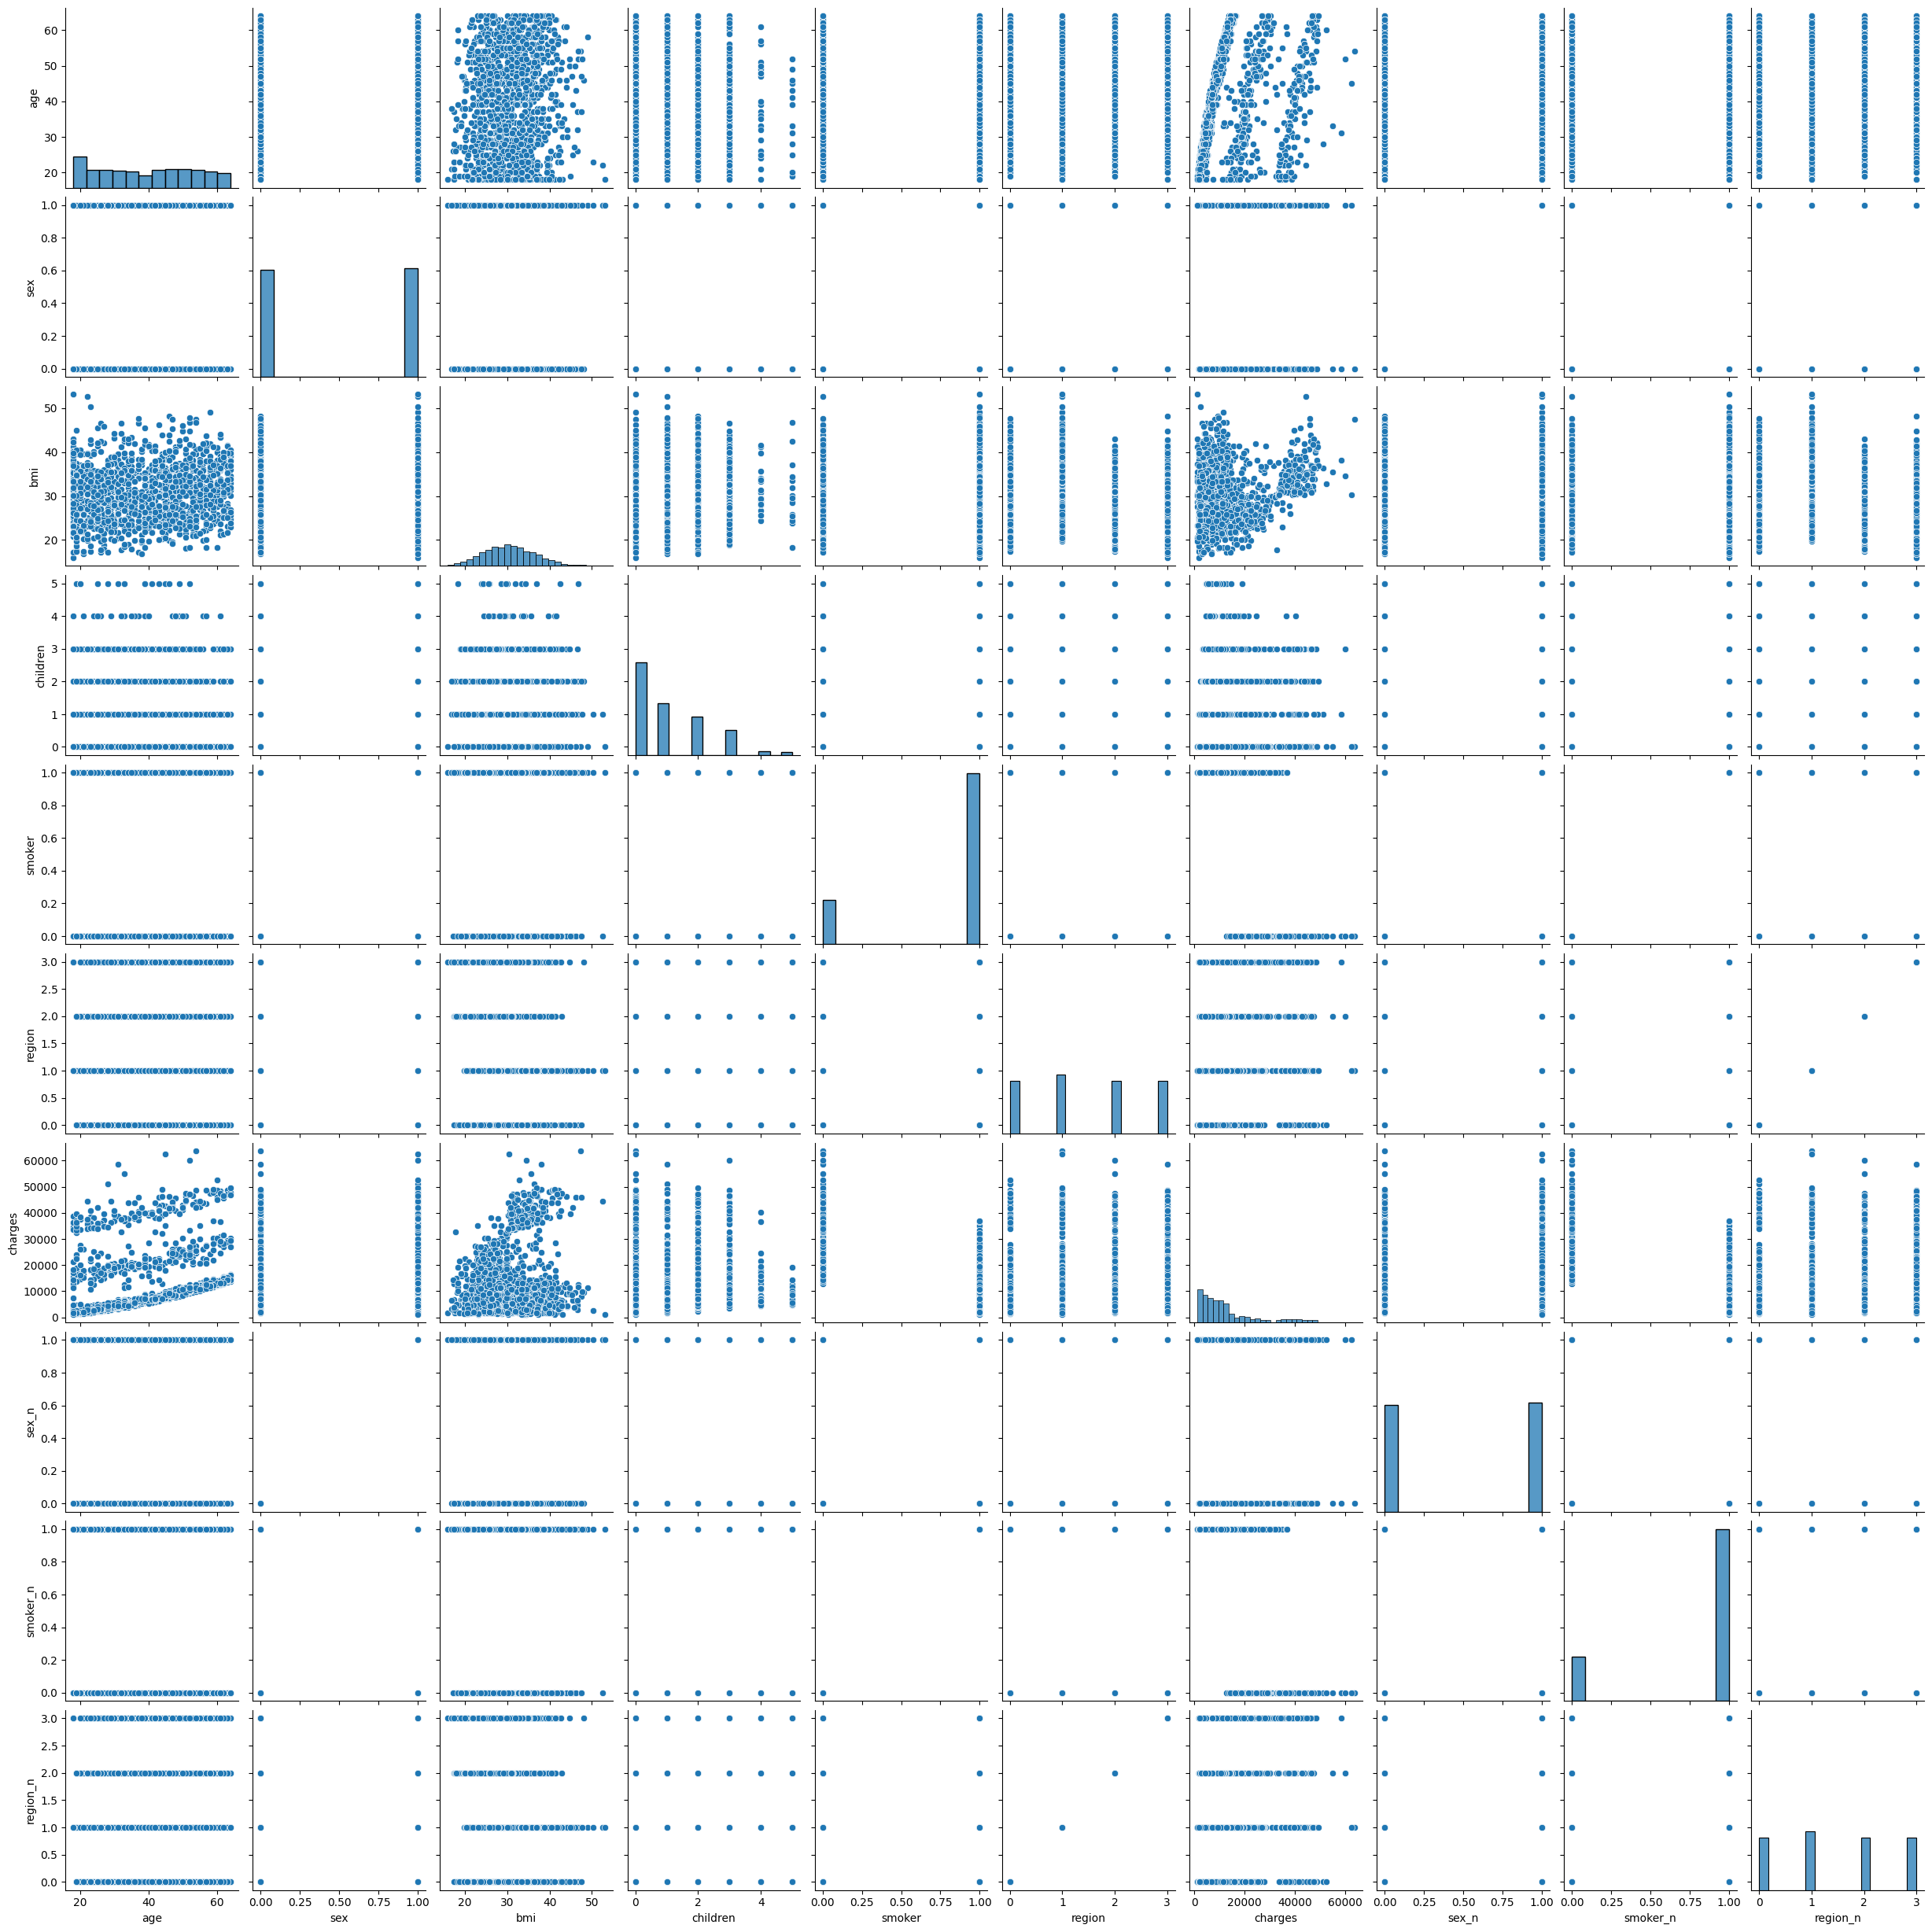

In [38]:
sns.pairplot(data=df)

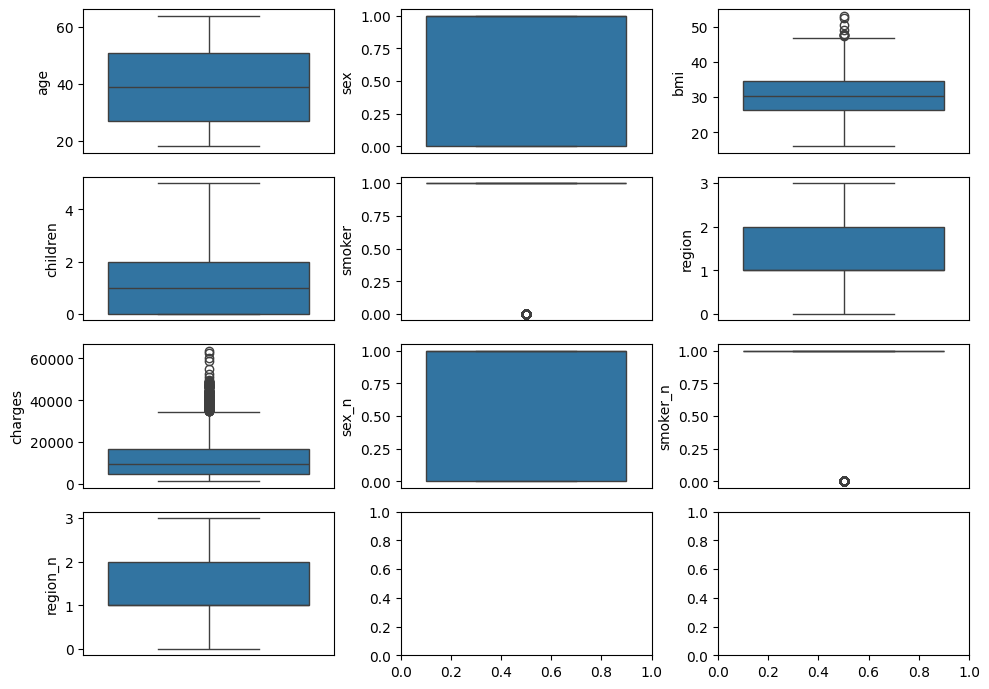

In [40]:
from utils import analisis_boxplot

analisis_boxplot(df,'charges')

In [41]:
from utils import analisis_ric

analisis_ric(df)

columna: age limites superior 87.0 e inferior -9.0
columna: sex limites superior 2.5 e inferior -1.5
columna: bmi limites superior 47.290000000000006 e inferior 13.7
columna: children limites superior 5.0 e inferior -3.0
columna: smoker limites superior 1.0 e inferior 1.0
columna: region limites superior 3.5 e inferior -0.5
columna: charges limites superior 34489.350562499996 e inferior -13109.1508975
columna: sex_n limites superior 2.5 e inferior -1.5
columna: smoker_n limites superior 1.0 e inferior 1.0
columna: region_n limites superior 3.5 e inferior -0.5


In [48]:
# Nuevas caracteristicas o eliminar redundantes
df.drop(['region','region_n'],axis=1,inplace=True)

KeyError: "['region', 'region_n'] not found in axis"

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

variables_num = ['age','bmi','children','sex_n', 'smoker_n']

features_escaladas = scaler.fit_transform(df[variables_num])

df_escalado = pd.DataFrame(features_escaladas,index=df.index,columns = variables_num)
df_escalado.head()

,age,bmi,children,sex_n,smoker_n
0,-1.438764,-0.453320,-0.908614,-1.010519,-1.970587
1,-1.509965,0.509621,-0.078767,0.989591,0.507463
2,-0.797954,0.383307,1.580926,0.989591,0.507463
3,-0.441948,-1.305531,-0.908614,0.989591,0.507463
4,-0.513149,-0.292556,-0.908614,0.989591,0.507463


In [60]:
df_escalado.describe()

,age,bmi,children,sex_n,smoker_n
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17,-1.234687e-16,-1.606421e-16
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01,-1.010519e+00,-1.970587e+00
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01,-1.010519e+00,5.074631e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02,9.895908e-01,5.074631e-01
75%,8.396738e-01,6.611572e-01,7.510793e-01,9.895908e-01,5.074631e-01
max,1.765289e+00,3.685522e+00,3.240619e+00,9.895908e-01,5.074631e-01


In [61]:
from sklearn.model_selection import train_test_split

X= df_escalado
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

X_train

,age,bmi,children,sex_n,smoker_n
560,0.483668,-1.757474,0.751079,-1.010519,0.507463
1285,0.554869,-1.040599,-0.908614,-1.010519,0.507463
1142,0.910875,-0.952015,-0.908614,-1.010519,0.507463
969,-0.014740,0.599846,3.240619,-1.010519,0.507463
486,1.053277,-1.508126,1.580926,-1.010519,0.507463
...,...,...,...,...,...
1095,-1.509965,0.112633,2.410772,-1.010519,0.507463
1130,-0.014740,-1.114419,3.240619,-1.010519,0.507463
1294,1.338082,-0.900341,-0.908614,0.989591,0.507463
860,-0.157143,2.778356,0.751079,-1.010519,-1.970587


In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [63]:
print(model.intercept_)
print(model.coef_)

13316.462576018224
[ 3.61045878e+03  1.99661405e+03  5.14859607e+02 -3.97567653e+00
 -9.54537070e+03]


In [64]:
y_pred = model.predict(X_test)
y_pred

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081, 11097.38383938,   145.27608963, 16746.1683771 ,
         747.53414191, 11153.67590722, 28518.15016561,  9292.18345421,
        5460.51975119, 38510.48013003, 40359.30938604, 37223.40538064,
       15316.56711945, 36047.50032223,  9326.29049907, 31400.1559532 ,
        4269.64414373, 10464.66374097,  2719.9260555 ,  6579.53742551,
       11232.00255515, 12472.06793446, 14807.11281089,  6066.19283362,
        9535.69029723,  2377.6983797 ,  9475.05690885, 12963.23366722,
        4706.09057393,  3414.674504  ,  4815.64981654, 12484.17176954,
        2359.13614479,  9161.02061228, 33238.67621442, 32743.41702445,
        4274.58967205,  4229.5442107 , 14435.36485176, 11384.66898976,
        8925.70468583, 12480.09178788,  5154.45787816,  3554.10047649,
       35649.60942684,  9276.25523701, 15971.35991397,  2552.75200479,
       12162.99980138,  1062.65132285, 13551.43771934, 12103.65505529,
      

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f'R2: {r2_score(y_test,y_pred)}')

MSE: 33979257.05080821
R2: 0.7811302113434095


In [66]:
len(y_pred)

268

In [67]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 764 to 846
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       268 non-null    float64
 1   bmi       268 non-null    float64
 2   children  268 non-null    float64
 3   sex_n     268 non-null    float64
 4   smoker_n  268 non-null    float64
dtypes: float64(5)
memory usage: 12.6 KB


In [68]:
from pickle import dump

dump(model,open('../models/linear_regression_default.sav','wb'))